In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import cm, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump
import combine.grid_analyze_version2 as ga

In [2]:
def widget_g_plot_exp(g, g2, phi=-1, title=None, widget=False, sharex=True, sharey=True):
    fig, (ax, ax2) = plt.subplots(figsize=(9.5,8), ncols=2, sharex=True, sharey=True)
    ax.set_aspect("equal"); ax2.set_aspect("equal")
    
    def g_plot(phi):
        ax.clear()
        # ax.set_title("Equal Spacing")
        ax.set_title("Grid 1")
        R, z, _ = np.transpose(g[:,:,phi,:], (2,0,1))
        ax.plot(R[:,::10], z[:,::10], c="blue", lw=.7, zorder=100)
        # ax.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax.plot(R,z, c="C0", lw=0.3, zorder=101)
        ax.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        ax2.clear()
        # ax2.set_title("Rescaled Spacing")
        ax2.set_title("Grid 2")
        R, z, _ = np.transpose(g2[:,:,phi,:], (2,0,1))
        ax2.plot(R[:,::10], z[:,::10], c="blue", lw=.7, zorder=100)
        # ax2.plot(R.T[:,::10], z.T[:,::10], c="red", lw=.7, zorder=100)
        ax2.plot(R,z, c="C0", lw=0.3, zorder=101)
        ax2.plot(R.T,z.T, c="red", lw=0.3, zorder=101)
        ax2.plot(R.T[0], z.T[0], c="darkblue", lw=1, zorder=102)
        fig.tight_layout()
    
    phi = widgets.IntSlider(min=0, max=g.shape[2]-1, value=0, step=1)
    widgets.interact(g_plot, phi = phi)

In [8]:
consts = {
        # in -> outside cell numbers (sum is redial resolution)
        "NirC": 10, "NirS": 5, "NirN": 5,
        # half(-1/2) poloidal and toroidal cell number (per half-module)
        "Niphalf": 50, "Nit": 35,
        # poloidal grid spacing and smoothing options implemented by phg
        "eq_space": True, "eq_space_vessel": False, "zoidpol": False,
        "normal_vessel": True, "normal_smooth": 15,  # proj for first vessel point
        # starting angle in [0,Nit[ and offset list of projection center
        "trace_index": 35, "center_delta_R": .15, # [0,0,0,0.2,.15],
        # path to magnetic field file
        "magnetic_field_file": "./Fields/Field-EIM-FullT-std.dat", # ErrFullT- FullT-
        "configuration": "EIM", # overwrites more specific changes
        "module": "full_module", # or "half_module" or "full_torus"
        "module_index": 0, # from 0 to 4 for starting position
    }

# shift spacings around
size = consts["Niphalf"]*2+1, consts["Nit"]*2-1
scales_mus_covs = [
    [ 0.0,  [0.1 ,0   ], [[15,0],[0,10]]],
]
        
#if True:
#    constants["vessel_pdf"] = multi_bump(size)
#    g1 = gen_grid(constants)

# constants["vessel_pdf"] = multi_bump(size, scales_mus_covs)
# g2 = gen_grid(constants)
# constants["zoidpol"] = False
# g1 = gen_grid(constants)

# g1 = gen_grid(consts)
# consts["vessel_pdf"] = multi_bump(size, scales_mus_covs)
g2 = gen_grid(consts)

GRID AND B FIELD RANGE MISSMATCH
[21. 73.  5.  0.  0.  1.  4.]
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


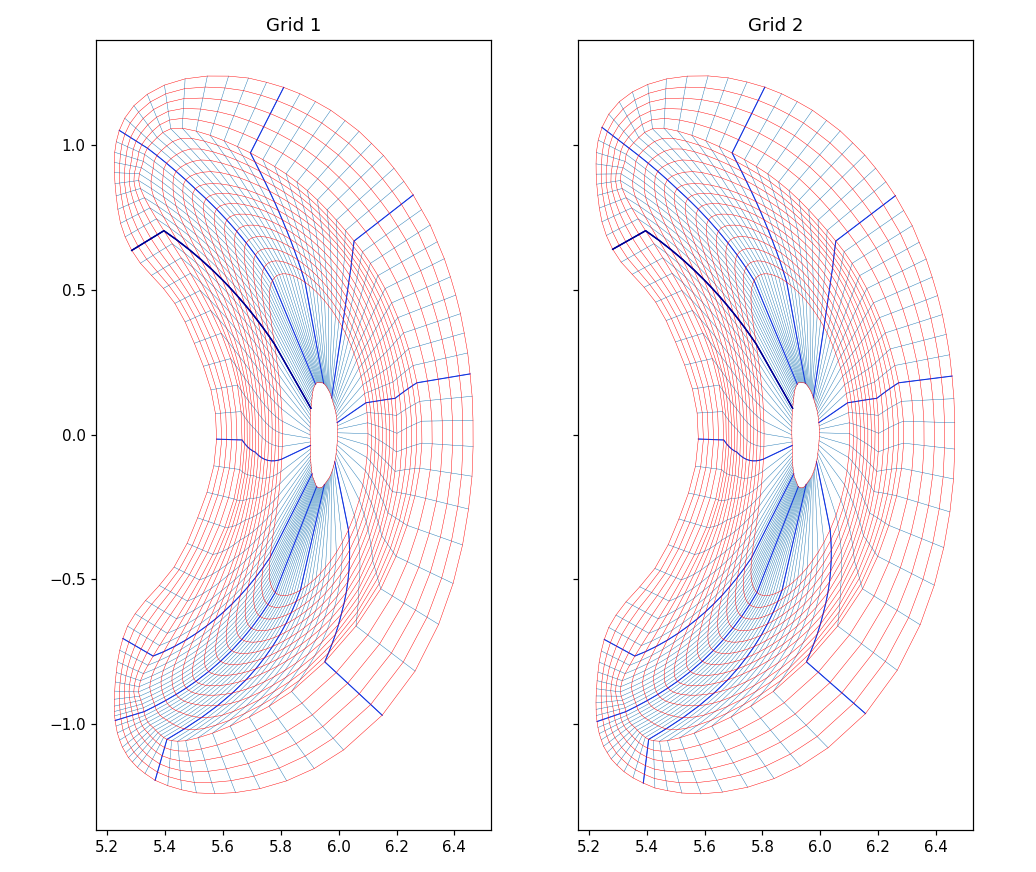

interactive(children=(IntSlider(value=0, description='phi', max=68), Output()), _dom_classes=('widget-interact…

In [9]:
widget_g_plot_exp(g1, g2, phi=0, widget=True)

In [7]:
analarr = ga.volume(g2)

In [8]:
r_max = np.unravel_index(np.argmax(analarr[0], axis=None), analarr[0].shape)
tht_max = np.unravel_index(np.argmax(analarr[1], axis=None), analarr[1].shape)
(r_max, tht_max)

((27, 17), (25, 11))

In [9]:
analarr[0][r_max], analarr[1][tht_max]

(0.00030180510482542535, 0.0003325612183498059)

In [10]:
np.unravel_index(np.argmin(analarr, axis=None), analarr.shape)

(9, 6, 24)

In [11]:
ret = np.nonzero(ga.nonconvex(g1) != 1)
_ = np.array([*ret]).T

In [12]:
np.sum(ga.volume(g2)), np.sum(ga.volume(g1))

(6.979133307378754, 6.979646736085722)

In [256]:
np.all(ga.nonconvex(g2) == 1)

True